In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.font_manager as fm
font_path = 'C:\Windows\Fonts'
plt.rc('font', family='HYGTRE')

In [47]:
raw_data = pd.read_excel('/JupyterNotbook/data/sleep.xlsx')
raw_data

,Index,date,입면시각,기상시각,총 수면시간,기상방법,피로도,약,토막잠,꿈 기억,하지불안약
0,1.0,20220202,3.5,10.5,7,고양이,0.0,0.0,1.0,0.0,NaN
1,2.0,20220203,2.5,11,8.5,그냥,2.0,0.0,1.0,0.0,NaN
2,3.0,20220204,3,10,7,그냥,1.0,0.0,1.0,0.0,NaN
3,4.0,20220205,5,11,6,그냥,0.0,0.0,0.0,0.0,NaN
4,5.0,20220206,5,13,8,그냥,0.0,0.0,1.0,0.0,NaN
5,6.0,20220207,5,7.5,2.5,알람,1.0,0.0,1.0,1.0,NaN
6,7.0,20220208,3,8,5,알람,2.0,0.0,0.0,0.0,NaN
7,8.0,20220209,3,7,4,알람,3.0,0.0,0.0,0.0,NaN
8,9.0,20220210,2,7.5,5.5,출근,3.0,0.0,0.0,0.0,NaN
9,10.0,20220211,3,7.5,4.5,출근,4.0,0.0,1.0,0.0,NaN


In [48]:
data = raw_data.set_index('date')
data = data.drop('Index', axis=1)
data = data.drop([20220304, 20220311, 20220314, 2022], errors='ignore')
data

,입면시각,기상시각,총 수면시간,기상방법,피로도,약,토막잠,꿈 기억,하지불안약
date,,,,,,,,,
20220202,3.5,10.5,7,고양이,0.0,0.0,1.0,0.0,NaN
20220203,2.5,11,8.5,그냥,2.0,0.0,1.0,0.0,NaN
20220204,3,10,7,그냥,1.0,0.0,1.0,0.0,NaN
20220205,5,11,6,그냥,0.0,0.0,0.0,0.0,NaN
20220206,5,13,8,그냥,0.0,0.0,1.0,0.0,NaN
20220207,5,7.5,2.5,알람,1.0,0.0,1.0,1.0,NaN
20220208,3,8,5,알람,2.0,0.0,0.0,0.0,NaN
20220209,3,7,4,알람,3.0,0.0,0.0,0.0,NaN
20220210,2,7.5,5.5,출근,3.0,0.0,0.0,0.0,NaN


<AxesSubplot:ylabel='date'>

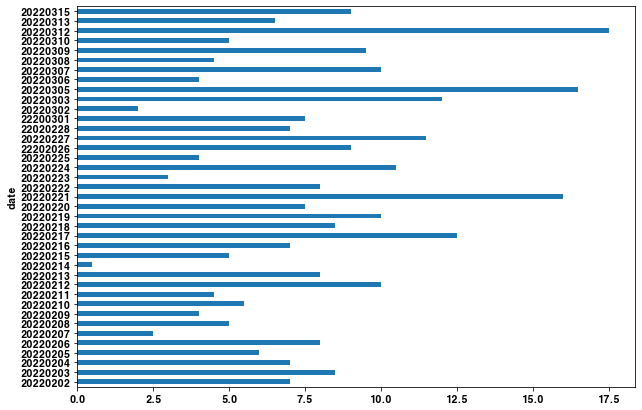

In [49]:
data['총 수면시간'].plot(kind='barh', figsize=(10, 7))

Text(0, 0.5, '기상시각')

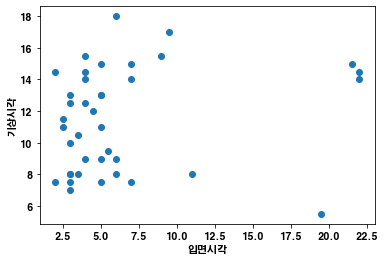

In [50]:
plt.scatter(data['입면시각'], data['기상시각'])
plt.xlabel('입면시각')
plt.ylabel('기상시각')

# 옆에 요일 적어주기